In [0]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

center_point = (41.1579, -8.6291)  # Пример: координаты центра (Порту, Португалия)
distance = 2500  # Радиус в метрах

# Загрузка графа дорожной сети из OpenStreetMap
G = ox.graph_from_point(center_point, dist=distance, network_type='drive')
G_undirected = G.to_undirected()

pos = {node: (data['x'], data['y']) for node, data in G_undirected.nodes(data=True)}
# plt.figure(figsize=(15, 15))
# nx.draw_networkx_edges(G_undirected, pos, alpha=0.5, edge_color='r')
# nx.draw_networkx_nodes(G_undirected, pos, node_size=5, node_color='b')
# plt.show()


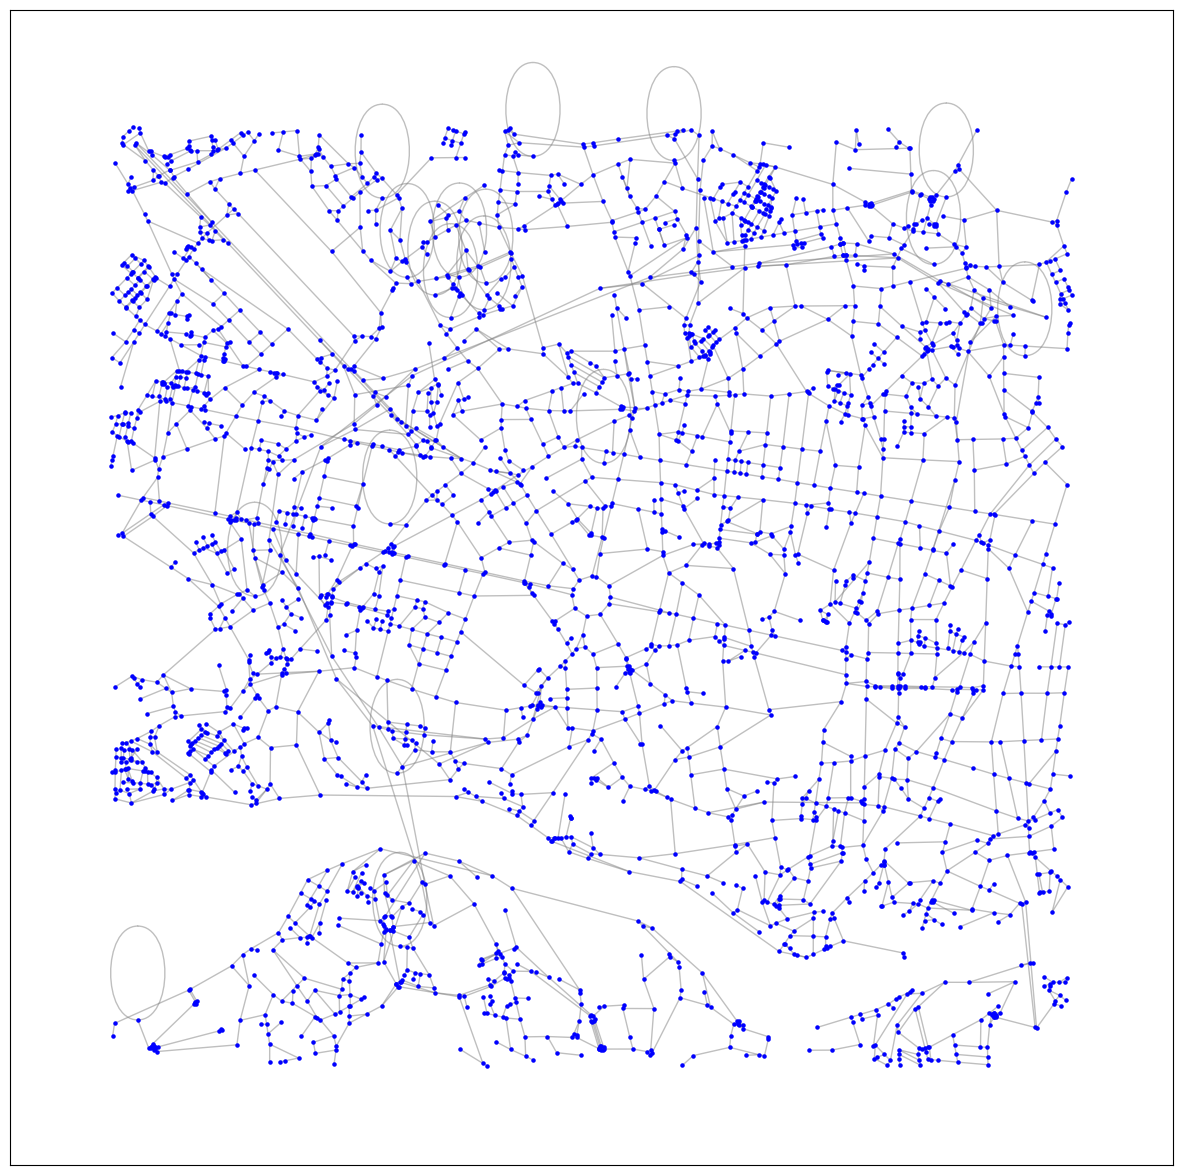

In [77]:
from itertools import combinations

def is_collinear(A, B, C):
    (x1, y1), (x2, y2), (x3, y3) = pos[A], pos[B], pos[C]
    return abs((y2 - y1) * (x3 - x2) - (y3 - y2) * (x2 - x1)) < 1e-9

squares = []
def find_all_squares(graph):
    nodes = list(graph.nodes())
    for n1, n2 in combinations(nodes, 2):
        if graph.has_edge(n1, n2):
            neighbors_n1 = set(graph.neighbors(n1))
            neighbors_n2 = set(graph.neighbors(n2))
            common_neighbors = neighbors_n1 & neighbors_n2
            for n3, n4 in combinations(common_neighbors, 2):
                if graph.has_edge(n3, n4):
                    if not (is_collinear(n1, n2, n3) or is_collinear(n1, n2, n4) or is_collinear(n2, n3, n4) or is_collinear(n1, n3, n4)):
                        squares.append((n1, n2, n3, n4))

G_simple = nx.Graph(G)
find_all_squares(G_simple)

plt.figure(figsize=(15, 15))
nx.draw_networkx_edges(G_simple, pos, alpha=0.5, edge_color='gray')
nx.draw_networkx_nodes(G_simple, pos, node_size=5, node_color='blue')

for square in squares:
    square_edges = [(square[i], square[(i+1)%4]) for i in range(4)]
    nx.draw_networkx_edges(G_simple, pos, edgelist=square_edges, edge_color='red', width=2)
plt.show()


from networkx.algorithms import cycle_basis

G_simple = nx.Graph(G)
edg = 25
cycles = []
for cycle in cycle_basis(G_simple):

    if len(cycle) == edg:
        cycles.append(cycle)


plt.figure(figsize=(15, 15))
for cycle in cycles:
    _edges = [(cycle[i], cycle[(i+1)%edg]) for i in range(edg)]
    nx.draw_networkx_edges(G_simple, pos, node_size=100, edgelist=_edges, edge_color='red', width=2)
nx.draw_networkx_edges(G_simple, pos, alpha=0.5, edge_color='gray')
nx.draw_networkx_nodes(G_simple, pos, node_size=1, node_color='blue')
plt.show()
        
        
